In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("../Part_2/energydata_complete.csv")
df.head(10)
df.tail(20)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19715,2016-05-27 14:50:00,60,0,25.500000,46.060000,26.350000,41.000000,28.426667,40.590000,24.666667,...,23.100000,46.590000,21.833333,755.80,59.000000,2.000000,21.166667,13.350000,37.889086,37.889086
19716,2016-05-27 15:00:00,60,0,25.500000,45.933333,26.277143,41.000000,28.356667,40.560000,24.666667,...,23.100000,46.590000,21.800000,755.80,59.000000,2.000000,21.000000,13.300000,17.123315,17.123315
19717,2016-05-27 15:10:00,70,0,25.500000,45.760000,26.200000,41.000000,28.290000,40.433333,24.700000,...,23.133333,46.590000,21.966667,755.75,58.333333,2.000000,21.333333,13.283333,24.058432,24.058432
19718,2016-05-27 15:20:00,80,0,25.500000,45.626667,26.171429,41.000000,28.260000,40.260000,24.700000,...,23.133333,46.590000,22.133333,755.70,57.666667,2.000000,21.666667,13.266667,9.538671,9.538671
19719,2016-05-27 15:30:00,80,0,25.500000,45.590000,26.100000,41.000000,28.200000,40.126667,24.700000,...,23.166667,46.590000,22.300000,755.65,57.000000,2.000000,22.000000,13.250000,30.020685,30.020685
19720,2016-05-27 15:40:00,70,0,25.500000,45.522500,26.100000,41.051429,28.200000,40.200000,24.700000,...,23.100000,46.590000,22.466667,755.60,56.333333,2.000000,22.333333,13.233333,23.851737,23.851737
19721,2016-05-27 15:50:00,100,0,25.500000,45.633333,26.080000,41.196000,28.133333,40.260000,24.700000,...,23.200000,46.590000,22.633333,755.55,55.666667,2.000000,22.666667,13.216667,47.981309,47.981309
19722,2016-05-27 16:00:00,100,0,25.500000,45.730000,26.000000,41.428571,28.100000,40.433333,24.700000,...,23.200000,46.590000,22.800000,755.50,55.000000,2.000000,23.000000,13.200000,18.215602,18.215602
19723,2016-05-27 16:10:00,90,0,25.500000,45.790000,26.000000,41.590000,28.100000,40.560000,24.700000,...,23.160000,46.590000,22.833333,755.45,55.000000,2.166667,22.833333,13.233333,38.751594,38.751594
19724,2016-05-27 16:20:00,100,0,25.500000,45.933333,26.000000,41.652857,28.000000,40.700000,24.700000,...,23.200000,46.621429,22.866667,755.40,55.000000,2.333333,22.666667,13.266667,32.306224,32.306224


In [4]:
df.shape


(19735, 29)

In [5]:
data_description = pd.read_csv("../Part_2/variables_description.txt", delimiter='\t')
data_description.head(40)

,Variable Description
0,====================
1,date time year-month-day hour:minute:second
2,"Appliances, energy use in Wh"
3,"lights, energy use of light fixtures in the ho..."
4,"T1, Temperature in kitchen area, in Celsius"
5,"RH_1, Humidity in kitchen area, in %"
6,"T2, Temperature in living room area, in Celsius"
7,"RH_2, Humidity in living room area, in %"
8,"T3, Temperature in laundry room area"
9,"RH_3, Humidity in laundry room area, in %"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [7]:
from datetime import datetime as dt
df['date'] = pd.to_datetime(df['date'])

In [8]:

import datetime
import calendar
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.weekday_name
df['time_hr_24']=df['date'].dt.hour
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night'
    
df['day_slot']=df['time_hr_24'].map(time_slot)

week1=range(1,8)
week2=range(8,15)
week3=range(15,22)
week4=range(22,29)

def week_num(x):
    if x in week1:
        return 'week1'
    elif x in week2:
        return 'week2'
    elif x in week3:
        return 'week3'
    elif x in week4:
        return 'week4'
    else:
        return 'week5' 
df['week']=df['day'].map(week_num)
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
df['week_day_type']=df['day_of_week'].map(week_day_type)

 
df.drop(['date'],axis=1,inplace=True)
df=pd.get_dummies(df,prefix=['DOW','TS','WDT','W'],columns=['day_of_week','day_slot','week_day_type','week'])
print(df.shape)
    
df.dtypes

(19735, 50)


Appliances         int64
lights             int64
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
year               int64
month              int64
day                int64
time_hr_24         int64
DOW_Friday         uint8
DOW_Monday         uint8
DOW_Saturday       uint8
DOW_Sunday         uint8
DOW_Thursday       uint8
DOW_Tuesday        uint8
DOW_Wednesday      uint8
TS_afternoon       uint8


In [200]:
df.day

0        11
1        11
2        11
3        11
4        11
5        11
6        11
7        11
8        11
9        11
10       11
11       11
12       11
13       11
14       11
15       11
16       11
17       11
18       11
19       11
20       11
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
         ..
19705    27
19706    27
19707    27
19708    27
19709    27
19710    27
19711    27
19712    27
19713    27
19714    27
19715    27
19716    27
19717    27
19718    27
19719    27
19720    27
19721    27
19722    27
19723    27
19724    27
19725    27
19726    27
19727    27
19728    27
19729    27
19730    27
19731    27
19732    27
19733    27
19734    27
Name: day, Length: 19735, dtype: int64

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df.select_dtypes(include=['float64','int64']))
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df.select_dtypes(include=['float64','int64']), 20))


Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T9    month    0.890605
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
dtype: float64


In [10]:
df['rv1'].corr(df['rv2'])
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'year', 'month', 'day', 'time_hr_24',
       'DOW_Friday', 'DOW_Monday', 'DOW_Saturday', 'DOW_Sunday',
       'DOW_Thursday', 'DOW_Tuesday', 'DOW_Wednesday', 'TS_afternoon',
       'TS_evening', 'TS_morning', 'TS_night', 'WDT_weekdays', 'WDT_weekends',
       'W_week1', 'W_week2', 'W_week3', 'W_week4', 'W_week5'],
      dtype='object')

In [11]:
phase = df.groupby(['month','day','time_hr_24','DOW_Monday','DOW_Saturday','DOW_Sunday','DOW_Thursday',
                    'DOW_Tuesday','DOW_Wednesday','DOW_Friday','TS_morning',
                    'TS_evening','TS_night', 'TS_afternoon']).mean()
phase["Total"]=phase["Appliances"] + phase["lights"]



In [12]:
phase['Total']

month  day  time_hr_24  DOW_Monday  DOW_Saturday  DOW_Sunday  DOW_Thursday  DOW_Tuesday  DOW_Wednesday  DOW_Friday  TS_morning  TS_evening  TS_night  TS_afternoon
1      11   17          1           0             0           0             0            0              0           0           1           0         0                90.000000
            18          1           0             0           0             0            0              0           0           1           0         0               228.333333
            19          1           0             0           0             0            0              0           0           1           0         0               198.333333
            20          1           0             0           0             0            0              0           0           1           0         0               160.000000
            21          1           0             0           0             0            0              0           0           1

From the above correlation matrix it could be found:
1. rv1 and rv2 are highly correlated.
2. T-out and T6 are highly correlated.
3. T9 and T7 are highly correlated

Thus, one of them must be rejected.

In [13]:
df=df.drop(['rv2','T9','T_out'],axis=1)

In [14]:
from matplotlib import cm as cm

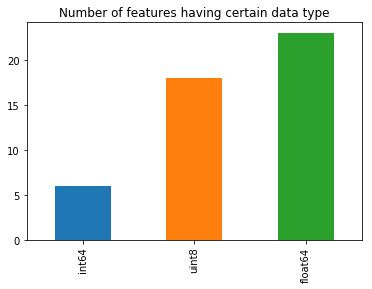

In [15]:
# correlation_matrix(df.select_dtypes(include=['float64','int64']))
df.dtypes.value_counts().sort_values().plot(kind='bar')
plt.title('Number of features having certain data type')
plt.show()

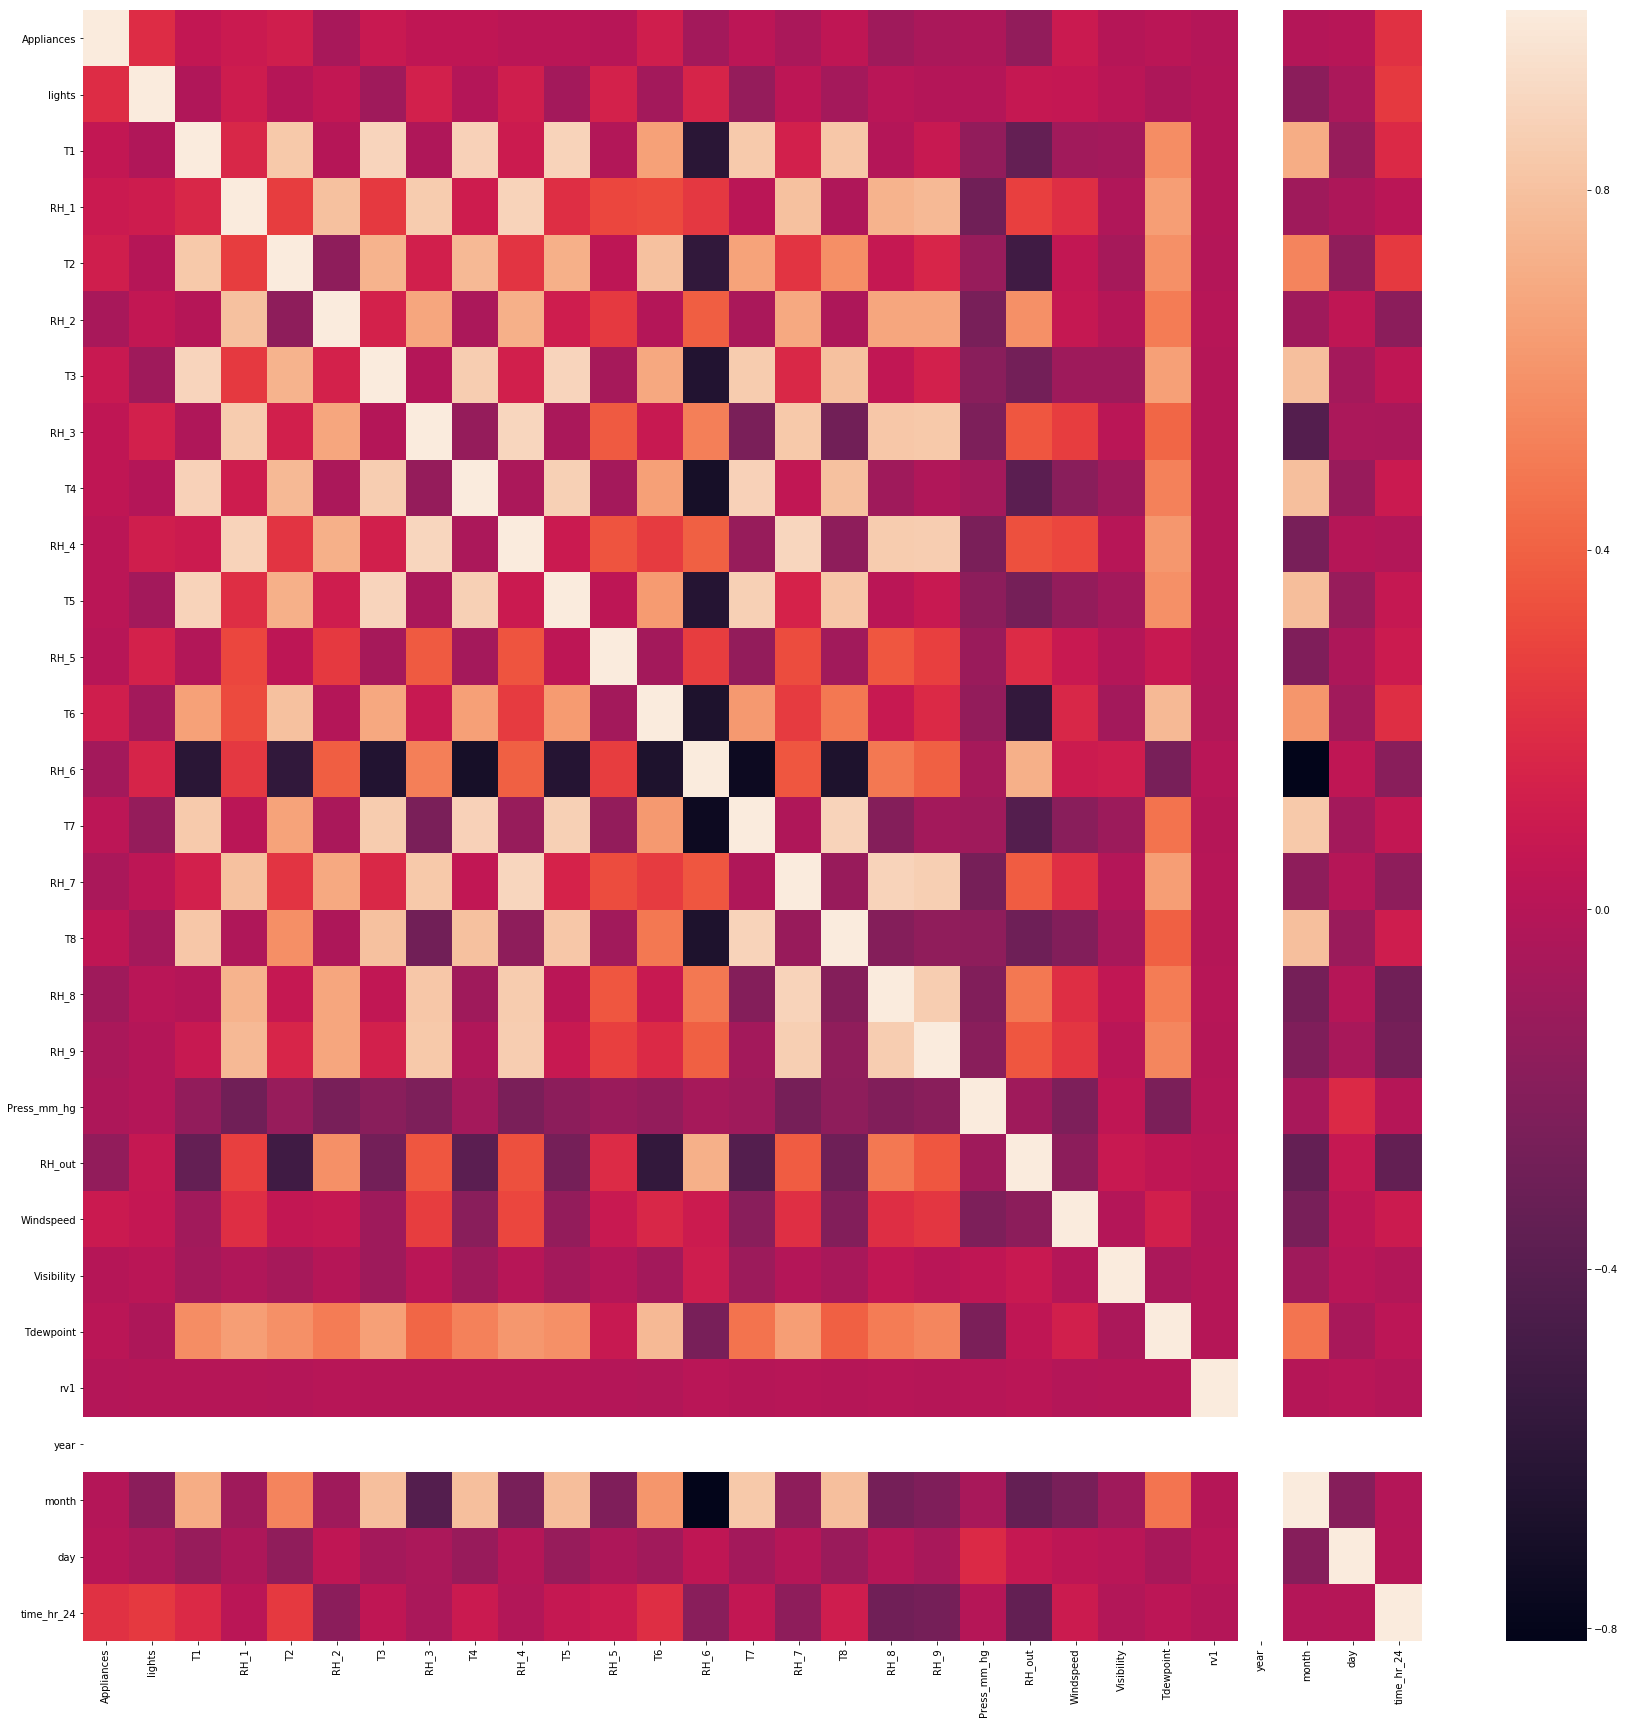

In [16]:
fig = plt.figure(figsize = (30,30))
ax1 = fig.add_subplot(111)
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


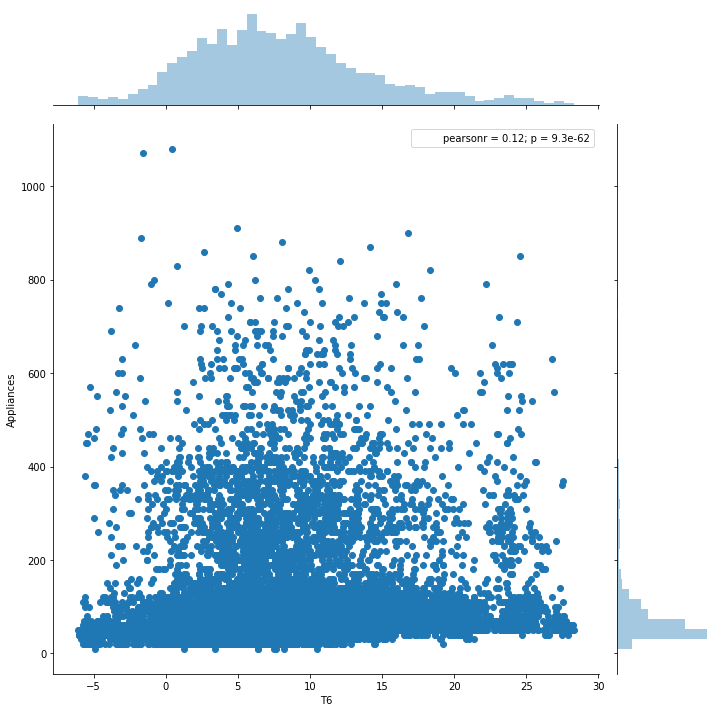

In [17]:
# df['Total_Usage'] = df['Appliances'] + df['lights']
sns.jointplot(x='T6',y='Appliances',data=df,size=10)

In [18]:
df['Appliances'].nunique()

92

In [129]:
# sns.jointplot(x='date',y='Total_Usage',data=df,size=10)

In [130]:
# df['Appliances'].plot(kind='bar')
# plt.title('Frequency of Appliances using Watts')
# plt.legend('Appliances')
# plt.show()

In [19]:
df['Appliances'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
90      1015
100      978
110      736
30       723
120      502
20       343
130      330
140      223
150      144
160       90
260       89
270       87
190       86
240       84
280       82
230       82
180       78
250       77
300       73
220       73
310       70
170       70
290       69
210       69
330       66
        ... 
10         9
700        9
690        9
570        8
710        8
720        7
640        7
650        7
750        7
680        6
740        5
790        4
760        4
780        4
670        4
800        3
730        3
850        2
770        2
820        2
880        1
830        1
910        1
840        1
1080       1
870        1
890        1
900        1
860        1
1070       1
Name: Appliances, Length: 92, dtype: int64

In [20]:
df['Appliances'].min()

10

In [21]:
df['Appliances'].max()

1080

In [22]:
df['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


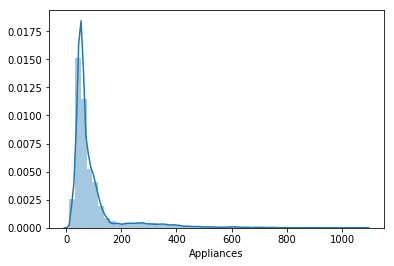

In [23]:
sns.distplot(df['Appliances'])

In [24]:
df.loc[df['Appliances'].idxmax()]

Appliances       1080.000000
lights             30.000000
T1                 21.930000
RH_1               42.766667
T2                 21.040000
RH_2               38.080000
T3                 20.700000
RH_3               40.633333
T4                 20.890000
RH_4               39.733333
T5                 18.890000
RH_5               51.881667
T6                  0.466667
RH_6               96.090000
T7                 19.790000
RH_7               37.184286
T8                 20.926667
RH_8               42.663333
RH_9               40.672500
Press_mm_hg       765.033333
RH_out             85.500000
Windspeed           3.666667
Visibility         40.000000
Tdewpoint          -0.083333
rv1                27.408521
year             2016.000000
month               1.000000
day                16.000000
time_hr_24         18.000000
DOW_Friday          0.000000
DOW_Monday          0.000000
DOW_Saturday        1.000000
DOW_Sunday          0.000000
DOW_Thursday        0.000000
DOW_Tuesday   

In [31]:
df.loc[df['T6'].idxmax()]

Appliances         50.000000
lights              0.000000
T1                 25.133333
RH_1               37.260000
T2                 26.533333
RH_2               31.566667
T3                 26.200000
RH_3               37.900000
T4                 25.000000
RH_4               36.326667
T5                 23.890000
RH_5               34.900000
T6                 28.290000
RH_6                1.000000
RH_7               33.194286
T8                 24.890000
RH_8               35.368571
T9                 23.100000
RH_9               39.363333
Press_mm_hg       751.100000
RH_out             33.000000
Windspeed           4.000000
Visibility         40.000000
Tdewpoint           7.100000
rv1                36.192531
year             2016.000000
month               5.000000
day                 8.000000
time_hr_24         15.000000
DOW_Friday          0.000000
DOW_Monday          0.000000
DOW_Saturday        0.000000
DOW_Sunday          1.000000
DOW_Thursday        0.000000
DOW_Tuesday   

In [25]:
df['month']= df.date.dt.month

AttributeError: 'DataFrame' object has no attribute 'date'

In [26]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'year', 'month', 'day', 'time_hr_24', 'DOW_Friday', 'DOW_Monday',
       'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday', 'DOW_Tuesday',
       'DOW_Wednesday', 'TS_afternoon', 'TS_evening', 'TS_morning', 'TS_night',
       'WDT_weekdays', 'WDT_weekends', 'W_week1', 'W_week2', 'W_week3',
       'W_week4', 'W_week5'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


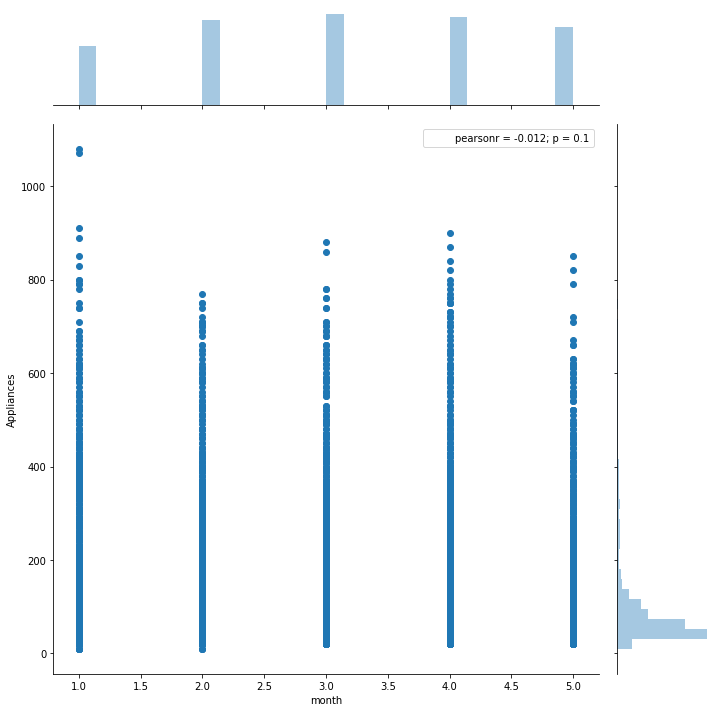

In [27]:
sns.jointplot(x='month',y='Appliances',data=df,size=10)

In [28]:
month_mean_T1=[]
month_mean_T2=[]
month_mean_T3=[]
month_mean_T4=[]
month_mean_T5=[]
month_mean_T6=[]
month_mean_T7=[]
month_mean_T8=[]
month_mean_T9=[]
month_mean_To=[]
month_mean_RH1=[]
month_mean_RH2=[]
month_mean_RH3=[]
month_mean_RH4=[]
month_mean_RH5=[]
month_mean_RH6=[]
month_mean_RH7=[]
month_mean_RH8=[]
month_mean_RH9=[]
month_mean_RHo=[]

In [41]:
for mon in df.month:
    month_mean_T1.append(df[df['month']==mon]['T1'].mean(axis=0))
    month_mean_T2.append(df[df['month']==mon]['T2'].mean(axis=0))
    month_mean_T3.append(df[df['month']==mon]['T3'].mean(axis=0))
    month_mean_T4.append(df[df['month']==mon]['T4'].mean(axis=0))
    month_mean_T5.append(df[df['month']==mon]['T5'].mean(axis=0))
    month_mean_T6.append(df[df['month']==mon]['T6'].mean(axis=0))
    month_mean_T8.append(df[df['month']==mon]['T8'].mean(axis=0))
    month_mean_T9.append(df[df['month']==mon]['T7'].mean(axis=0))
    month_mean_RH1.append(df[df['month']==mon]['RH_1'].mean(axis=0))
    month_mean_RH2.append(df[df['month']==mon]['RH_2'].mean(axis=0))
    month_mean_RH3.append(df[df['month']==mon]['RH_3'].mean(axis=0))
    month_mean_RH4.append(df[df['month']==mon]['RH_4'].mean(axis=0))
    month_mean_RH5.append(df[df['month']==mon]['RH_5'].mean(axis=0))
    month_mean_RH6.append(df[df['month']==mon]['RH_6'].mean(axis=0))
    month_mean_RH7.append(df[df['month']==mon]['RH_7'].mean(axis=0))
    month_mean_RH8.append(df[df['month']==mon]['RH_8'].mean(axis=0))
    month_mean_RH9.append(df[df['month']==mon]['RH_9'].mean(axis=0))
    month_mean_RHo.append(df[df['month']==mon]['RH_out'].mean(axis=0))


    
    

ValueError: x and y must have same first dimension, but have shapes (19735,) and (19736,)

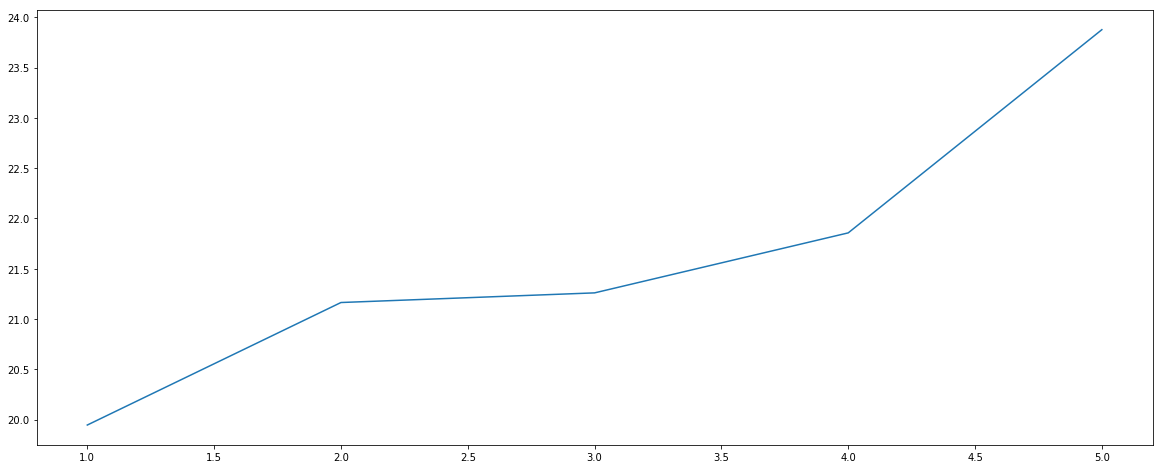

In [46]:
plt.rcParams['figure.figsize'] = (20, 8)
month1=df['month'].unique
month_mean_T1new=month_mean_T1
plt.plot(df['month']  , month_mean_T1 , label = 'Kitchen Area')
plt.plot(df['month'] , month_mean_T2 , label = 'Living Room')
plt.plot(df['month'] , month_mean_T3 , label = 'Laundry Room')
plt.plot(df['month'] , month_mean_T4 , label = 'Office Room')
plt.plot(df['month'] , month_mean_T5 , label = 'Bathroom')
plt.plot(df['month'] , month_mean_T6 , label = 'Outside Building')
plt.plot(df['month'] , month_mean_T8 , label = 'Teenager Room')
plt.plot(df['month'] , month_mean_T9 , label = 'Parents Room')

plt.xlabel("Months" , fontsize=15)
plt.ylabel("Mean Temperature in ($^\circ$C)" , fontsize=15)
plt.title("Mean Temperature of every room for first 5 months" , fontsize=20)
y = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May']

plt.legend()
plt.show()

In [42]:
len(month_mean_T2)


19736

In [43]:
df['month'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [44]:
unique_month_mean_T2=set(month_mean_T2)
len(unique_month_mean_T2)

5

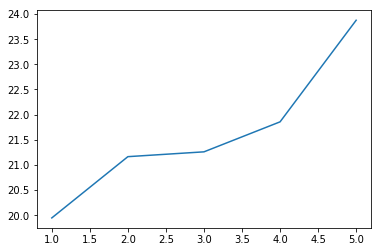

In [45]:
# Energy usage by day
month_mean_T1=[]
for mon in df.month:
    month_mean_T1.append(df[df['month']==mon]['T1'].mean(axis=0))
plt.plot(df['month'] , month_mean_T1 , label = 'Kitchen Area')

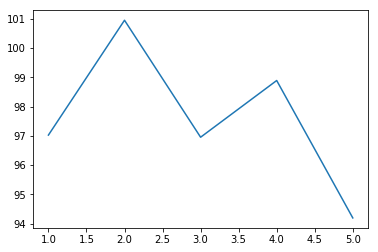

In [34]:
mean_appliances_consumption=[]
for mon in df.month:
    mean_appliances_consumption.append(df[df['month']==mon]['Appliances'].mean(axis=0))
plt.plot(df['month'] , mean_appliances_consumption , label = 'Kitchen Area')

In [47]:
mean_appliances_consumption

[97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,
 97.02600958247776,


In [48]:
# here we are trying to find the mean of usage of appliances according to the time of the day
df['time_of_day']=df.date.dt.time
# for time in df.date.dt.time:
#     time.append()

AttributeError: 'DataFrame' object has no attribute 'date'

In [35]:
#df.time_of_day

0        17:00:00
1        17:10:00
2        17:20:00
3        17:30:00
4        17:40:00
5        17:50:00
6        18:00:00
7        18:10:00
8        18:20:00
9        18:30:00
10       18:40:00
11       18:50:00
12       19:00:00
13       19:10:00
14       19:20:00
15       19:30:00
16       19:40:00
17       19:50:00
18       20:00:00
19       20:10:00
20       20:20:00
21       20:30:00
22       20:40:00
23       20:50:00
24       21:00:00
25       21:10:00
26       21:20:00
27       21:30:00
28       21:40:00
29       21:50:00
           ...   
19705    13:10:00
19706    13:20:00
19707    13:30:00
19708    13:40:00
19709    13:50:00
19710    14:00:00
19711    14:10:00
19712    14:20:00
19713    14:30:00
19714    14:40:00
19715    14:50:00
19716    15:00:00
19717    15:10:00
19718    15:20:00
19719    15:30:00
19720    15:40:00
19721    15:50:00
19722    16:00:00
19723    16:10:00
19724    16:20:00
19725    16:30:00
19726    16:40:00
19727    16:50:00
19728    17:00:00
19729    1

In [36]:
# Appliances_mean=[]
# for month in energy_data_complete['month']:
#     for time in energy_data_complete[energy_data_complete['month']==mon]['time_of_day']:
#         Appliances_mean.append
# plt.plot(energy_data_complete['time_of_day'] , energy_data_complete['Appliances'] )

In [37]:
#df['only_date']=energy_data_complete['date'].dt.date

In [38]:
#energy_data_complete['only_date']

0        2016-01-11
1        2016-01-11
2        2016-01-11
3        2016-01-11
4        2016-01-11
5        2016-01-11
6        2016-01-11
7        2016-01-11
8        2016-01-11
9        2016-01-11
10       2016-01-11
11       2016-01-11
12       2016-01-11
13       2016-01-11
14       2016-01-11
15       2016-01-11
16       2016-01-11
17       2016-01-11
18       2016-01-11
19       2016-01-11
20       2016-01-11
21       2016-01-11
22       2016-01-11
23       2016-01-11
24       2016-01-11
25       2016-01-11
26       2016-01-11
27       2016-01-11
28       2016-01-11
29       2016-01-11
            ...    
19705    2016-05-27
19706    2016-05-27
19707    2016-05-27
19708    2016-05-27
19709    2016-05-27
19710    2016-05-27
19711    2016-05-27
19712    2016-05-27
19713    2016-05-27
19714    2016-05-27
19715    2016-05-27
19716    2016-05-27
19717    2016-05-27
19718    2016-05-27
19719    2016-05-27
19720    2016-05-27
19721    2016-05-27
19722    2016-05-27
19723    2016-05-27


In [39]:
# average_appliance_usage_time=[]
# for month in energy_data_complete['month']:
#     for date in energy_data_complete[energy_data_complete['month']==month]['day']:
#         for time in energy_data_complete[energy_data_complete['day']==date]['time_of_day']:
#             average_appliance_usage_time.append(energy_data_complete[energy_data_complete['time_of_day']==time]['Appliances'].mean(axis=0))

In [50]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

Number of variables,47
Number of observations,19735
Total Missing (%),0.0%
Total size in memory,4.7 MiB
Average record size in memory,250.0 B
Numeric,28
Categorical,0
Boolean,18
Date,0
Text (Unique),0
Rejected,1


In [51]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'year', 'month', 'day', 'time_hr_24', 'DOW_Friday', 'DOW_Monday',
       'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday', 'DOW_Tuesday',
       'DOW_Wednesday', 'TS_afternoon', 'TS_evening', 'TS_morning', 'TS_night',
       'WDT_weekdays', 'WDT_weekends', 'W_week1', 'W_week2', 'W_week3',
       'W_week4', 'W_week5'],
      dtype='object')

In [42]:
# import calendar
# energy_data_complete['year']=energy_data_complete['date'].dt.year
# energy_data_complete['day']=energy_data_complete['date'].dt.day
# energy_data_complete['day_of_week']=energy_data_complete['date'].dt.weekday_name
# energy_data_complete['time_hr_24']=energy_data_complete['date'].dt.hour
# morning=range(6,12)
# afternoon=range(12,17)
# evening=range(17,22)
# def time_slot(x):
#     if x in morning:
#         return 'morning'
#     elif x in afternoon:
#         return 'afternoon'
#     elif x in evening:
#         return 'evening'
#     else:
#         return 'night'
    
# energy_data_complete['day_slot']=energy_data_complete['time_hr_24'].map(time_slot)

# week1=range(1,8)
# week2=range(8,15)
# week3=range(15,22)
# week4=range(22,29)

# def week_num(x):
#     if x in week1:
#         return 'week1'
#     elif x in week2:
#         return 'week2'
#     elif x in week3:
#         return 'week3'
#     elif x in week4:
#         return 'week4'
#     else:
#         return 'week5' 
# energy_data_complete['week']=energy_data_complete['day'].map(week_num)



In [43]:
# Feature Engineering here:-
# Sunday=0
#Monday=1
#tuesday=2
#Wednesday=3
#Thursday=4
#Friday=5
#Saturday=6
#df.replace({'a' : { 'Medium' : 2, 'Small' : 1, 'High' : 3 }})

# energy_data_complete=energy_data_complete.replace({'day_of_week': 
#                                                    {'Sunday' : 0, 'Monday' : 1, 'Tuesday' : 2, 
#                                                     'Thursday' : 4, 'Friday': 5, 'Saturday' : 6, 'Wednesday' : 3 }})

# weekend = [6,0]
# # 0 for weekend and 1 for weekday
# def week_day_type(x):
#     if x in weekend:
#         return '0'
#     else:
#         return '1'
# energy_data_complete['week_day_type']=energy_data_complete['day_of_week'].map(week_day_type)
    
# energy_data_complete.dtypes

date             datetime64[ns]
Appliances                int64
lights                    int64
T1                      float64
RH_1                    float64
T2                      float64
RH_2                    float64
T3                      float64
RH_3                    float64
T4                      float64
RH_4                    float64
T5                      float64
RH_5                    float64
T6                      float64
RH_6                    float64
RH_7                    float64
T8                      float64
RH_8                    float64
T9                      float64
RH_9                    float64
Press_mm_hg             float64
RH_out                  float64
Windspeed               float64
Visibility              float64
Tdewpoint               float64
rv1                     float64
month                     int64
time_of_day              object
only_date                object
year                      int64
day                       int64
day_of_w

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm=LinearRegression()

In [55]:

X = df.drop(['Appliances'],axis=1)
y = df['Appliances']


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.68077451e+00 -6.74990599e-01  1.33207856e+01 -1.91633207e+01
 -1.34246672e+01  2.47021221e+01  6.84813473e+00  3.18809450e-01
 -1.61903977e+00 -4.37837667e+00  6.76445796e-02  3.23949344e+00
 -1.20231607e-01 -3.97025297e+00 -8.27511492e-01  8.57884700e+00
 -2.62027751e+00 -1.54133581e+00  3.46415323e-01  9.41059862e-01
  1.78803945e+00  1.86068698e-01 -2.47347672e+00  3.86640710e-02
 -8.88178420e-16 -1.35225437e+01  3.22096965e-01 -5.31417980e-02
  1.43971163e+01  4.00916828e+00  1.03999990e+01 -7.57058219e+00
 -6.56661251e+00 -9.24194257e+00 -5.42714632e+00  1.34839527e+00
  2.36397489e+01  8.79718840e+00 -3.37853326e+01 -2.82941679e+00
  2.82941679e+00  6.18649433e+00  5.16748943e+00 -5.84891452e-01
 -4.74907692e+00 -6.02001539e+00]


In [60]:
#Prediction using Linear Regression
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

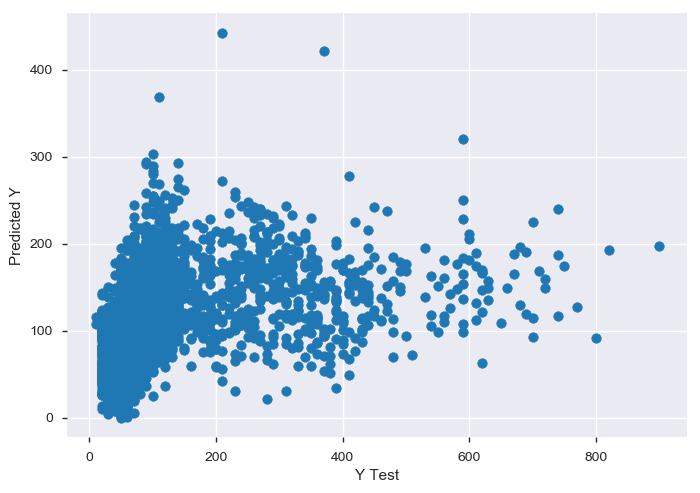

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 52.42331889706597
MSE: 8058.514072032981
RMSE: 89.76922675412204


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


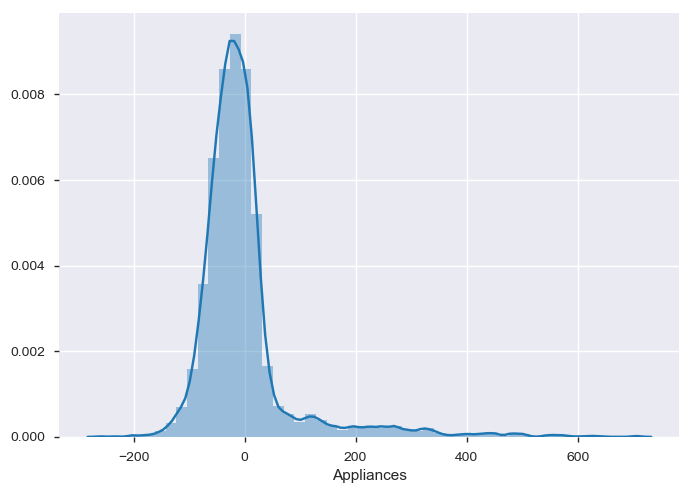

In [63]:
# Residuals
sns.distplot((y_test-predictions),bins=50)

In [65]:
def view_metrics(y_test, predictions, algorithm, samples, total_samples):
    '''
    Plots the true and predicted values and prints RMS, MAE and MAPE metrics.
    '''
#     fig = plt.figure(figsize=(18,5))
#     plt.scatter(x=[i for i in range(samples)], y=[x for x in predictions[0:samples]], label='Predicted values')
#     plt.scatter(x=[i for i in range(samples)], y=[x[0] for x in y_test.values[0:samples]], label='True values')
#     plt.title('True and Predicted values for test dataset - %s' % algorithm)
#     plt.legend()
#     plt.show()
#     fig = plt.figure(figsize=(18,5))
#     plt.scatter(x=[i for i in range(total_samples)], y=[x for x in predictions], label='Predicted values')
#     plt.scatter(x=[i for i in range(total_samples)], y=[x[0] for x in y_test.values], label='True values')
#     plt.title('True and Predicted values for test dataset - %s' % algorithm)
#     plt.legend()
#     plt.show()

    RMS =  np.sqrt(mean_squared_error(y_test, predictions, multioutput='raw_values'))
    MAE = mean_absolute_error(y_test, predictions, multioutput='raw_values')
    MAPE = mean_absolute_percentage_error(y_test, predictions)
    print("Root Mean Squared Error:", RMS)
    print("Mean Absolute Error", MAE) 
    print("Mean Absolute Percentage Error", MAPE)
    return RMS, MAE, MAPE

In [68]:
#lin_reg_model_metrics = view_metrics(y_test, predictions,'Linear Regression', samples = 50, total_samples=2000)
## If predicted value is same as true value, the points will be overlapping. Closer the points, better is the prediction.

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
# Random Forest Regressor
# model = RandomForestRegressor(n_estimators=300, max_features = 11)
#     # create the RFE model and select 3 attributes
# rfe = RFE(model)
# rfe = rfe.fit(X_train, y_train)
#     # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)
# print(rfe.n_features_)
#     #Check the accuracy of the model
# rfe.score(X_train, y_train)
rand_forest_model = RandomForestRegressor(max_depth=5, random_state=0) # build model
rand_forest_model = rand_forest_model.fit(X_train, y_train.values.ravel()) # train model
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
feature_importance = rand_forest_model.feature_importances_
R2 = rand_forest_model.score(X_train, y_train) # coefficient of determination
rand_forest_model_predictions = rand_forest_model.predict(X_test) # make predictions

Text(0,0.5,'Predicted Y')

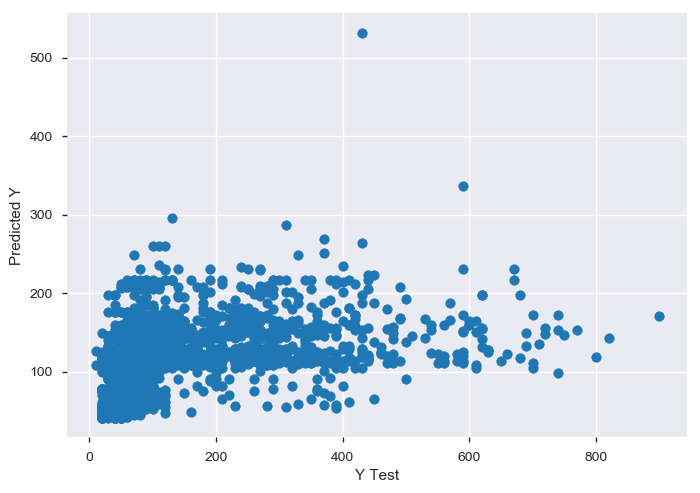

In [68]:
# rand_forest_model_metrics = view_metrics(y_test, rand_forest_model_predictions,'Random Forest Regressor', samples = 50, total_samples=2000)
plt.scatter(y_test,rand_forest_model_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, rand_forest_model_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rand_forest_model_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rand_forest_model_predictions)))

MAE: 48.93580116680759
MSE: 7861.511807754687
RMSE: 88.66516682302407


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


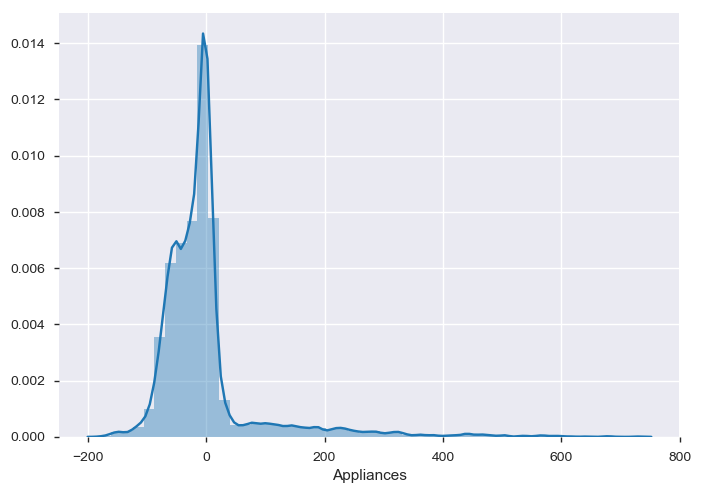

In [70]:
sns.distplot((y_test-rand_forest_model_predictions),bins=50)

In [71]:
from sklearn.feature_selection import RFE

In [72]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [73]:
X_train_minmax = min_max.fit_transform(X_train)

In [74]:
X_test_minmax=min_max.fit_transform(X_test)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
X_train_scale=scaler.fit_transform(X_train)

In [78]:
X_test_scale=scaler.fit_transform(X_test)

In [79]:
error_metric = pd.DataFrame({'r2_train': [],
                            'r2_test': [],
                             'rms_train':[], 
                            'rms_test': [],
                            'mae_train': [],
                            'mae_test':[],
                            'mape_train':[],
                            'mape_test':[]})
    
rmse_dict = {}    
        
def calc_error_metric(modelname, model, X_train_scale, y_train, X_test_scale, y_test):
    global error_metric
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
        
    #MAE, RMS, MAPE, R2
    
    r2_train = r2_score(y_train, y_train_predicted)
    r2_test = r2_score(y_test, y_test_predicted)
    
    rms_train = sqrt(mean_squared_error(y_train, y_train_predicted))
    rms_test = sqrt(mean_squared_error(y_test, y_test_predicted))
        
    mae_train = mean_absolute_error(y_train, y_train_predicted)
    mae_test = mean_absolute_error(y_test, y_test_predicted)
        
    mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
        
    rmse_dict[modelname] = rms_test
        
    df_local = pd.DataFrame({'Model':[modelname],
                            'r2_train': [r2_train],
                            'r2_test': [r2_test],
                            'rms_train':[rms_train], 
                            'rms_test': [rms_test],
                            'mae_train': [mae_train],
                            'mae_test': [mae_test],
                            'mape_train':[mape_train],
                            'mape_test':[mape_test]})
        
    error_metric = pd.concat([error_metric, df_local])
    return error_metric

In [80]:
from sklearn.neural_network import MLPRegressor

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
from math import sqrt

In [83]:
import operator

In [84]:
# Regression
clf = LinearRegression()
clf.fit(X_train, y_train)
calc_error_metric('Linear Regression', clf, X_train, y_train, X_test, y_test)
print('Linear Regression Peformed')

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)
calc_error_metric('RandomForest', rf, X_train, y_train, X_test, y_test)
print('RandomForest Performed')
    
# Neural network
nn = MLPRegressor()
nn.fit(X_train, y_train)
calc_error_metric('Neural Network', nn, X_train, y_train, X_test, y_test)
print('Neural Network performed')
    
#### Calculate best model
best_model =  min(rmse_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is-', best_model)
    
#### Write the error
error_metric.to_csv('Error_metrics.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



Linear Regression Peformed


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



RandomForest Performed
Neural Network performed
Best Model is- RandomForest


In [85]:
error_metric

,Model,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,Linear Regression,52.423319,52.370893,62.380215,60.003663,0.188783,0.204621,89.769227,92.264605
0,RandomForest,46.016903,44.436447,51.369062,47.937982,0.271722,0.359570,85.056498,82.791183
0,Neural Network,66.205036,66.974466,90.807562,89.213301,0.070247,0.074010,96.104301,99.552314


Text(0,0.5,'Feature Importance Score')

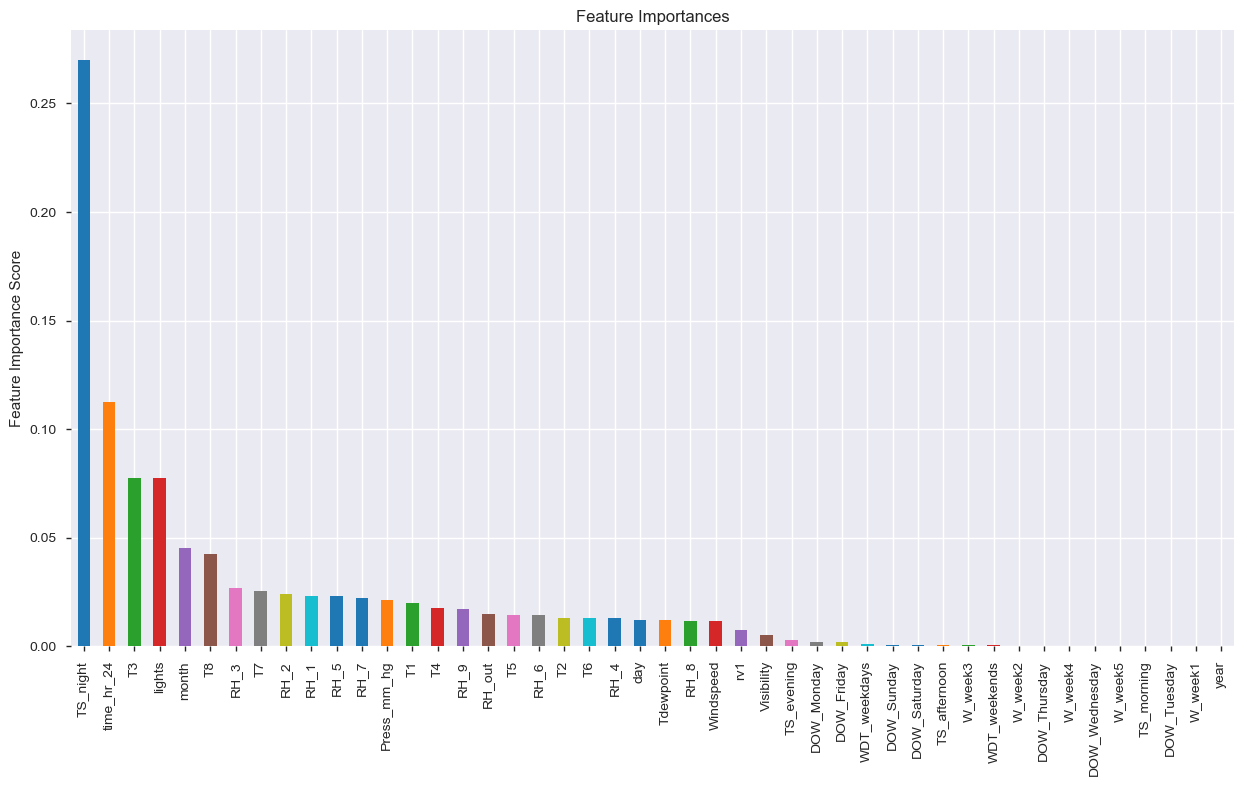

In [88]:
# Feature Importance in Random Forest 
imp_feature = pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=False)
imp_feature.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Feature Importance Score')

In [89]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'year', 'month', 'day', 'time_hr_24', 'DOW_Friday', 'DOW_Monday',
       'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday', 'DOW_Tuesday',
       'DOW_Wednesday', 'TS_afternoon', 'TS_evening', 'TS_morning', 'TS_night',
       'WDT_weekdays', 'WDT_weekends', 'W_week1', 'W_week2', 'W_week3',
       'W_week4', 'W_week5'],
      dtype='object')

# Gradient Boosting Machine- GBM

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbm=GradientBoostingRegressor(n_estimators= 300,learning_rate = 1.0, max_features= 'sqrt') 

gbm.fit(X_train, y_train)
y_pred=gbm.predict(X_test) 

print ("Feature Importances" )
print (gbm.feature_importances_)
       

print ("R-squared for Train: %.2f" %gbm.score(X_train, y_train))
print ("R-squared for Test: %.2f" %gbm.score(X_test, y_test))

Feature Importances
[0.01738116 0.02683244 0.03959349 0.03370188 0.05467699 0.0397747
 0.0449254  0.04023129 0.04174994 0.04201283 0.03736871 0.04496272
 0.04291673 0.032261   0.04045101 0.04564446 0.04533637 0.03655833
 0.06199588 0.0411768  0.02828775 0.02011133 0.03971509 0.01767396
 0.         0.00814713 0.01839278 0.02379329 0.00400187 0.00205609
 0.0042974  0.00045363 0.00287076 0.0015899  0.00115091 0.0020308
 0.0023975  0.0033262  0.00402053 0.00043723 0.00121994 0.00094747
 0.00085566 0.00063234 0.00033325 0.00170509]
R-squared for Train: 0.75
R-squared for Test: 0.35


In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# from sklearn.model_selection import GridSearchCV
# # from sklearn import cross_validation
# from sklearn.model_selection import LeaveOneGroupOut

MAE: 46.353445443418856
MSE: 6457.683898584913
RMSE: 80.35971564524674


Text(0,0.5,'Predicted Y')

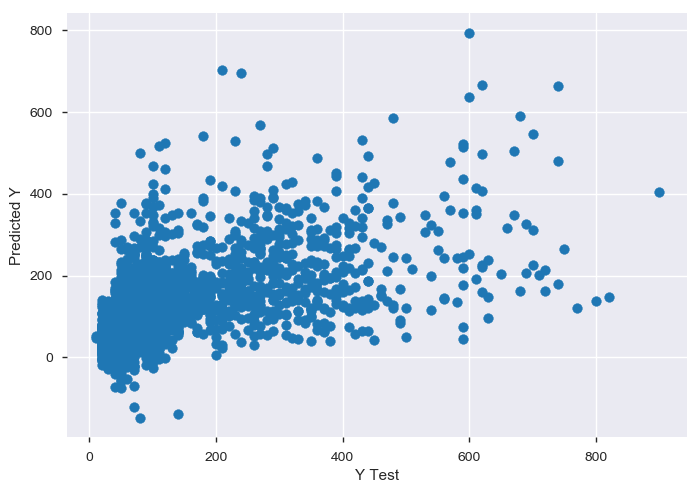

In [94]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [95]:
model = RandomForestRegressor(n_estimators=20, max_features = 11)
rfe = RFE(model)
rfe = rfe.fit(X_train, y_train)
    # summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(rfe.n_features_)
    #Check the accuracy of the model
rfe.score(X_train, y_train)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False False False  True False False False False False False False False
 False False  True False False False False False False False]
[ 2  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  1  1
 24  7  4  1  8  9 10 20 22 15 23 16  6 12  1 18 11 17 21 14 13 19]
23


0.929116937246858

In [90]:
model = RandomForestRegressor(n_estimators=20, max_features = 11)
rfe = RFE(model)
rfe = rfe.fit(X_train, y_train)
    # summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(rfe.n_features_)
    #Check the accuracy of the model
rfe.score(X_test, y_test)

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False  True  True
 False False False  True False False False False False False False False
 False False  True False False False False False False False]
[ 1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  6  1  1
 24  7  4  1  8  9 10 19 21 11 22 13  5 17  1 12 15 20 16 18 14 23]
23


0.5297603171841764

**So, After running our final pipeline our Model is   52.9 % accurate.**